In [1]:
! pip install '../en_core_sci_md-0.5.0.tar.gz' #please insert the filepath 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./drive/MyDrive/Cohere/en_core_sci_md-0.5.0.tar.gz
     |████████████████████████████████| 6.0 MB 6.4 MB/s 
     |████████████████████████████████| 10.1 MB 20.4 MB/s 
     |████████████████████████████████| 660 kB 56.5 MB/s 
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.5.0-py3-none-any.whl size=120252807 sha256=6befbed291ec28daa7b201529c75b6d597857db7970340fc1c761dce4f784399
  Stored in directory: /root/.cache/pip/wheels/f5/fb/72/3c0dbd839e852f335dadea9721c146b23ab81039a34a8a00b0
Successfully built en-core-sci-md
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.2
    Uninstalling pydantic-1.9.2:
      Successfully uninstalled pydantic-1.9.

In [2]:
! pip install -r '../requirements.txt' #please insert the filepath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.1 MB/s 
     |████████████████████████████████| 1.7 MB 12.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 13.5 MB 42.9 MB/s 
     |████████████████████████████████| 71 kB 7.5 MB/s 
     |████████████████████████████████| 636 kB 53.5 MB/s 
     |████████████████████████████████| 88 kB 8.4 MB/s 
     |████████████████████████████████| 85 kB 5.3 MB/s 
     |████████████████████████████████| 5.2 MB 39.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.7 MB 42.3 MB/s 
     |█████████████████████████████

In [4]:
import pandas as pd
import string
import glob
import re
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import *
import pprint
import warnings
import joblib

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

import spacy
import scispacy
nlp = spacy.load("en_core_sci_md")

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from bertopic import BERTopic
from flair.embeddings import TransformerDocumentEmbeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/tornado/httputil.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class HTTPHeaders(collections.MutableMapping):


In [5]:
warnings.filterwarnings("ignore")

In [6]:
file_path = ' '  #please insert the filepath

# Preprocessing

In [7]:
def extract_data(start_column, end_column):
    try:
        start_index = max(index for index, item in enumerate(arr) if item == start_column)
        stop_index = max(index for index, item in enumerate(arr) if item == end_column)
        farr = arr[start_index + 1: stop_index]
        return " ".join(farr)
    except:
        max(0,0)

def preprocess(text):
  text = text.lower()
  
  text = re.sub(r'\d+', '', str(text))  #remove numbers

  # removing salutaions (if any)
  text = re.sub("mr\.",'mr',  str(text))
  text = re.sub("mrs\.",'mrs',str(text))
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r'won\'t', 'will not', text)
  text = text.replace('(ap)', '')
  text = re.sub(r"\'s", " is ", text)
  text = re.sub(r'(\w+)\'s', '\g<1> is', text)
  text = re.sub(r'(\w+)\'ve', '\g<1> have', text)
  text = re.sub(r"can't", "cannot ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)

  # substitute multiple whitespace with single whitespace
  # Also, removes leading and trailing whitespaces
  text = re.sub(r'\W+', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  
  text = text.strip()

  # remove short words (< 3 char)
  text = re.sub(r'\b\w{1,3}\b', '', str(text))

  #remove stopwords
  stopword = stopwords.words('english')
  text = " ".join([word for word in str(text).split() if word not in stopword])

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

  FREQ_WORDS = ["pain","patient","home","history","hospital","day","negative","positive","primary","diagnosis",
                "culture","left","night","right","report","transferred","year","intubated","arrival","admit"
                "micu","admission","baseline","secondary","site","month","clinic","time","male","female"]
  text = ' '.join([word for word in str(text).split() if word not in FREQ_WORDS])

  #remove punctuation 
  remoe_punct = string.punctuation
  text = text.translate(str.maketrans('','',remoe_punct))
  return text

def med_preprocess(text):
  text = nlp(text)
  text = ' '.join(token.text for token in text.ents)
  return text

In [8]:
his = []
dis = []
chief = []
passes = 25
filelist = glob.glob(file_path + '/data' + '/*.txt')

for i in range(len(filelist)):
    with open(filelist[i], 'r') as f:
        arr = []
        for line in f:
            arr.append(line.strip('\n'))

    his.append(extract_data('History of Present Illness:', 'Past Medical History:'))
    chief.append(extract_data('Chief Complaint:', 'Major Surgical or Invasive Procedure:'))
    dis.append(extract_data('Discharge Diagnosis:', 'Discharge Condition:'))

data = {'Chief Complaint': chief, 'History of Present Illness': his, 'Discharge Diagnosis': dis}
df = pd.DataFrame(data=data)
df = df.mask(df.eq("None")).dropna().reset_index(drop=True)
df['Text'] = df['Chief Complaint'] + df['History of Present Illness'] + df['Discharge Diagnosis']
joblib.dump(df,file_path + "/data.csv")
df['Chief Complaint'] = df['Chief Complaint'].apply(lambda text : text.split(','))
df = df.explode('Chief Complaint').reset_index(drop=True)
df['cleaned text'] = df["Text"].apply(lambda text: preprocess(text))
df['cleaned text'] = df['cleaned text'].apply(lambda text : med_preprocess(text))
df['tokens'] = df['cleaned text'].apply(word_tokenize)

In [9]:
ydf = df[['cleaned text','tokens']].copy()

bigram = gensim.models.Phrases(ydf['tokens'], min_count=5, threshold=100)
bigramModel = gensim.models.phrases.Phraser(bigram)

ydf['bigramTokens'] = ydf['tokens'].apply(lambda tokens: bigramModel[tokens])

# Creating Dictionary
id2word = corpora.Dictionary(ydf['bigramTokens'])

# Creating Corpus
texts = ydf['bigramTokens'].tolist()
dictionary = Dictionary(texts)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# LDA Model

In [10]:
def LDAmodel(num_topics, passes):
    return gensim.models.ldamodel.LdaModel(
        corpus=tqdm_notebook(corpus, leave=False),
        id2word=id2word,
        alpha=1, eta=0.1,
        num_topics=num_topics, # the number of topics is equal to num_topics
        random_state=7,
        eval_every=1,
        chunksize=200,
        passes=passes,
        per_word_topics=True
        )

def coherence_computation(model):
    coherence = gensim.models.CoherenceModel(
        model = model, 
        texts = texts,
        dictionary = id2word, coherence='c_v'
        )
    return coherence.get_coherence()

def display_topics(model):
    topics = model.show_topics(num_topics=model.num_topics, formatted=False, num_words=10)
    topics = map(lambda c: map(lambda cc: cc[0], c[1]), topics)
    DATA = pd.DataFrame(topics)
    DATA.index = ['topic_{0}'.format(i) for i in range(model.num_topics)]
    DATA.columns = ['keyword_{0}'.format(i) for i in range(1, 10+1)]
    return DATA
  
def explore_models(DATA, range = range(5, 25)):
    id2word = corpora.Dictionary(DATA['bigramTokens'])
    texts = DATA['bigramTokens'].tolist()
    corpus = [id2word.doc2bow(text) for text in texts]

    coherence_values = []
    model_list = []
    
    for num_topics in tqdm_notebook(range, leave=False):
        lda = LDAmodel(num_topics, passes=passes)
        model_list.append(lda)
        coherence = coherence_computation(lda)
        coherence_values.append(coherence)

    fig = plt.figure(figsize=(10,5))
    plt.title('Optimal number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence Score')
    plt.grid(True)
    plt.plot(range, coherence_values)
    
    return coherence_values, model_list

In [11]:
def format_topics_sentences(ldamodel,corpus,texts):
  sent_topics_df = pd.DataFrame()
  for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list            
    # print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:  # => dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

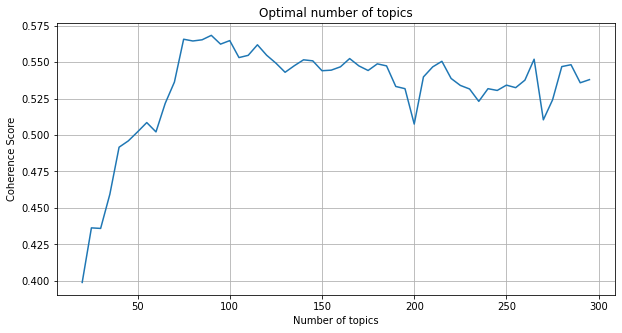

In [12]:
coherence_values, model_list = explore_models(ydf, range = range(20, 300, 5))

In [13]:
limit=300; start=20; step=5;
x = range(start, limit, step)
val = []
for m, cv in zip(x, coherence_values):
    val.append((round(cv, 4),m))

max_value = max(val)
max_value

(0.5684, 90)

In [14]:
bestModel = LDAmodel(num_topics= 90, passes=passes)
bestModel.save(file_path + '/lda_train.model')

for idx, topic in bestModel.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

  0%|          | 0/338 [00:00<?, ?it/s]

Topic: 80 
Words: suspected|nurse|pathology|level|lithium|sensitive|bipolar|tremulous|carboplatin|psychotic|gvhd|streptococcs|basic|clozapine|increaisngly|agranulocytosis|poisoned|tremulousness|tip|flight_stair|viridans|ambulate|walker|bili|lithium_toxicity|schizophrenia|avastin|chief|well|cancer
Topic: 27 
Words: procedure|diabetes_mellitus|vocal_cord|plan|dopamine|thrombosis|transfused|flow|cramping|area|multiple|foot|intoxication|toxicology|paroxysmal_nocturnal|dual|angioplasty|presyncope|stemi|cath|tramatic|ankle|charchot|portacath|snow|hypercholesteremia|tortuous|electrocardioversion|shoveling|partial
Topic: 7 
Words: hyperlipidemia|atrial_fibrillation|disease|stenosis|active|anterior|aortic_stenosis|serum|coronary_artery|cold|bright|prescribed|hypothermia|spine|severe|lightheadedness|volume|ceftriaxone|overload|dopamine|ramus|hypoglycemia|intake|spanish|intolerance|small|trauma|resolved|matched|idiopathic
Topic: 71 
Words: hypothyroidism|vascular|respiratory_distress|spasm|electi

In [15]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=bestModel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,73.0,0.2511,"fever, nausea, abdominal, vomiting, fluid, sep...","[hypotension, elevated, brights, disease, rena..."
1,1,73.0,0.2511,"fever, nausea, abdominal, vomiting, fluid, sep...","[hypotension, elevated, brights, disease, rena..."
2,2,23.0,0.1042,"chest, fever, cough, nausea, abdominal, diarrh...","[abdominal, remission, cord, transplant, anthr..."
3,3,27.0,0.1281,"procedure, diabetes_mellitus, vocal_cord, plan...","[thrombosis, rectal, partial, thrombosis, admi..."
4,4,13.0,0.1543,"scan, graft, hematoma, discharge, bilateral, t...","[woman, recurrent, namepattern, namepattern, f..."
5,5,21.0,0.1685,"pancreatitis, infection, surgery, multiple, mu...","[foot, infection, type, diabetes, charcot, foo..."
6,6,21.0,0.1685,"pancreatitis, infection, surgery, multiple, mu...","[foot, infection, type, diabetes, charcot, foo..."
7,7,30.0,0.1229,"cardiac, disease, femoral, acute, rehab, propo...","[fever, cabg, wound, hospitalization, cabg, da..."
8,8,23.0,0.1633,"chest, fever, cough, nausea, abdominal, diarrh...","[flank, metastatic, adenocarcinoma, gemcitabin..."
9,9,23.0,0.2838,"chest, fever, cough, nausea, abdominal, diarrh...","[respiratory_distress, slurred_speech, medical..."


In [16]:
df['Chief Complaint'].head(10)

0    Hypotension with elevated lactate
1                        code sepsis. 
2                      Abdominal Pain 
3                      SVC thrombosis 
4                                 SOB 
5                  Left Foot Infection
6                                 DKA 
7                               Fever 
8                    right flank pain 
9                 respiratory distress
Name: Chief Complaint, dtype: object

In [17]:
vis = gensimvis.prepare(topic_model=bestModel, corpus=corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# HDA Model

In [18]:
def format_topics_sentence(model,corpus,texts):
  sent_topics_df = pd.DataFrame()
  for i, row_list in enumerate(model[corpus]):
    row = row_list           
    # print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:  # => dominant topic
        wp = model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

In [19]:
hdp = gensim.models.HdpModel(corpus = corpus,
                             id2word = id2word,
                             chunksize=200,
                             gamma = 1,
                             alpha = 0.1,
                             random_state = 7)

In [20]:
hdp.show_topics()

[(0,
  '0.004*fever + 0.003*headache + 0.003*vomiting + 0.003*sore_throat + 0.002*nausea + 0.002*failure + 0.002*abdominal + 0.002*wall + 0.002*coumadin + 0.002*renal + 0.002*pallid + 0.002*diarrhea + 0.002*bowel + 0.002*chest + 0.002*vision + 0.002*gastrointestinal + 0.002*difficulty + 0.002*septum + 0.002*film + 0.001*week'),
 (1,
  '0.003*blood + 0.002*nausea + 0.002*fever + 0.002*response + 0.002*location + 0.002*chest + 0.002*pulmonary + 0.002*ganglion + 0.002*bilat + 0.002*symptom + 0.002*access + 0.002*vascular + 0.002*shortness_breath + 0.002*block + 0.002*rescetion + 0.002*dexamethasone + 0.002*swallowing + 0.002*unchanged + 0.002*vasopressin + 0.001*diarrhaea'),
 (2,
  '0.004*abdominal + 0.002*cough + 0.002*thoracics + 0.002*disease + 0.002*supervise + 0.002*clothes + 0.002*exertion + 0.002*unit + 0.002*azithromycin + 0.002*hematology + 0.002*supportive + 0.002*finding + 0.002*wire + 0.002*pauci + 0.002*gent + 0.001*hour + 0.001*chronic + 0.001*fluconazole + 0.001*inflammatio

In [21]:
coherence_computation(hdp)

0.7431594623055635

In [22]:
df_topic_sents_keywords = format_topics_sentence(model=hdp,corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9993,"disease, abdominal, epigastric, cardiac, renal...","[hypotension, elevated, brights, disease, rena..."
1,1,4.0,0.9993,"disease, abdominal, epigastric, cardiac, renal...","[hypotension, elevated, brights, disease, rena..."
2,2,21.0,0.4789,"endocrine, administered, sheet, radiation, irr...","[abdominal, remission, cord, transplant, anthr..."
3,3,0.0,0.9981,"fever, headache, vomiting, sore_throat, nausea...","[thrombosis, rectal, partial, thrombosis, admi..."
4,4,2.0,0.9992,"abdominal, cough, thoracics, disease, supervis...","[woman, recurrent, namepattern, namepattern, f..."
5,5,68.0,0.9989,"claudication, diarrhoea, pneumosepsis, infecti...","[foot, infection, type, diabetes, charcot, foo..."
6,6,68.0,0.9989,"claudication, diarrhoea, pneumosepsis, infecti...","[foot, infection, type, diabetes, charcot, foo..."
7,7,12.0,0.7722,"question, palpitation, atrial_fibrillation, ce...","[fever, cabg, wound, hospitalization, cabg, da..."
8,8,17.0,0.9992,"diuresed, stool, adenopathy, coughed, urologis...","[flank, metastatic, adenocarcinoma, gemcitabin..."
9,9,10.0,0.9990,"myasthenia, narcotic, tube, derangement, abces...","[respiratory_distress, slurred_speech, medical..."


In [23]:
print(max(df_dominant_topic['Dominant_Topic']))

142.0


# BERT

In [24]:
def mini_preprocess(text):
  text = text.lower()
  
  text = re.sub(r'\d+', '', str(text))  #remove numbers

  # removing salutaions (if any)
  text = re.sub("mr\.",'mr',  str(text))
  text = re.sub("mrs\.",'mrs',str(text))
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r'won\'t', 'will not', text)
  text = text.replace('(ap)', '')
  text = re.sub(r"\'s", " is ", text)
  text = re.sub(r'(\w+)\'s', '\g<1> is', text)
  text = re.sub(r'(\w+)\'ve', '\g<1> have', text)
  text = re.sub(r"can't", "cannot ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)

  # substitute multiple whitespace with single whitespace
  # Also, removes leading and trailing whitespaces
  text = re.sub(r'\W+', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  text = re.sub(r'\b\w{1,3}\b', '', str(text))

  stopword = stopwords.words('english')
  text = " ".join([word for word in str(text).split() if word not in stopword])

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

  
  FREQ_WORDS = ["pain","patient","home","history","hospital","day","negative","positive","primary","diagnosis",
                "culture","left","night","right","report","transferred","year","intubated","arrival","admit"
                "micu","admission","baseline","secondary","site","month","clinic","time","male","female"]
  text = ' '.join([word for word in str(text).split() if word not in FREQ_WORDS])

  return text

In [25]:
data['text'] = df['Text'].copy()
data['text'] = data['text'].apply(lambda x : mini_preprocess(x))
new_list = data['text'].values.tolist()

In [26]:
model = TransformerDocumentEmbeddings('sarahmiller137/BiomedNLP-PubMedBERT-base-uncased-abstract-ft-ncbi-disease')

In [27]:
topic_model = BERTopic(embedding_model=model).fit(new_list)

In [28]:
pprint.pprint(topic_model.get_topics())

{-1: [('denies', 0.029062653639549466),
      ('name', 0.02740939254328597),
      ('last', 0.026521923537859447),
      ('nausea', 0.024263781099904107),
      ('given', 0.022421419154558513),
      ('also', 0.022194213098532346),
      ('abdominal', 0.021473860726393852),
      ('chest', 0.020864915684876393),
      ('cough', 0.02056501707732103),
      ('fever', 0.020423148044859073)],
 0: [('fever', 0.02802539104381543),
     ('given', 0.02459383454212593),
     ('name', 0.023446548390183994),
     ('received', 0.023315838267678097),
     ('blood', 0.022826251623063027),
     ('last', 0.022656268217542765),
     ('abdominal', 0.02260352816108532),
     ('diarrhea', 0.021906437306476293),
     ('nausea', 0.021524459476869776),
     ('chest', 0.020822982373833385)],
 1: [('also', 0.025605110472608845),
     ('given', 0.0251550524786494),
     ('showed', 0.024306323960949384),
     ('started', 0.021877531510527484),
     ('presented', 0.01892038676263493),
     ('chest', 0.01829515011